In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
df = pd.read_csv('anime.csv')
df.shape

(12294, 7)

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
df['rating'].mean()

6.473901690981432

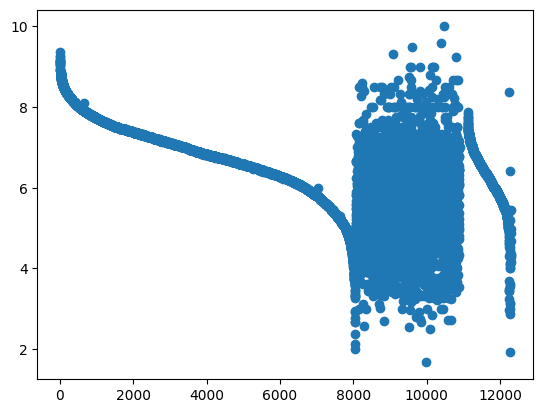

In [8]:
plt.scatter(np.arange(len(df['rating'])),df['rating'].values)
plt.show()

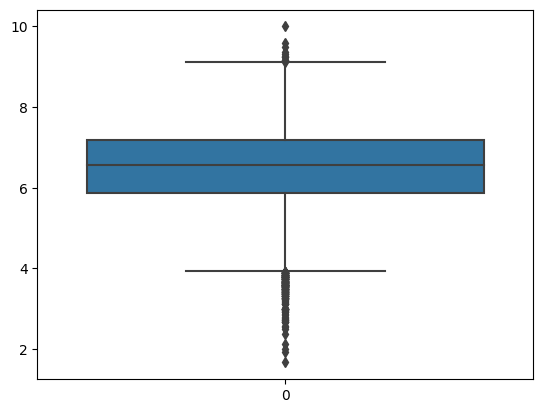

In [9]:
sns.boxplot(df['rating'])
plt.show()

In [10]:
df['rating'].fillna(df['rating'].mean(),inplace=True)
df.isna().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [11]:
df[df['genre'].isna()].head()

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607


In [12]:
data_copy = df.copy()
data_copy.shape

(12294, 7)

In [13]:
df.isna().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [14]:
df['genre'].dropna()

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12232, dtype: object

In [15]:
12294 - 12232

62

In [16]:
df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [17]:
df[df['genre'].isna()].isna().sum()

anime_id     0
name         0
genre       62
type         3
episodes     0
rating       0
members      0
dtype: int64

In [18]:
df = df.dropna()
df.shape

(12210, 7)

In [19]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [20]:
label = LabelEncoder()
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [21]:
df['type'].value_counts()


TV         3777
OVA        3310
Movie      2306
Special    1674
ONA         655
Music       488
Name: type, dtype: int64

In [22]:
encoded = label.fit_transform(df['type'])
len(encoded)

12210

In [23]:
label.inverse_transform(encoded)

array(['Movie', 'TV', 'TV', ..., 'OVA', 'OVA', 'Movie'], dtype=object)

In [24]:
df['type'] = encoded
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  int32  
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 715.4+ KB


In [26]:
df[df['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",5,Unknown,8.580000,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",5,Unknown,8.250000,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",5,Unknown,7.940000,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",5,Unknown,7.730000,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",4,Unknown,7.720000,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,3,Unknown,6.473902,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,3,Unknown,6.473902,392
12280,34312,Saimin Class,Hentai,3,Unknown,6.473902,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,3,Unknown,6.473902,195


In [27]:
np.nan

nan

In [28]:
df2 = df.copy()
df['episodes'].replace('Unknown',np.nan,inplace=True)

In [29]:
df['episodes'].isna().sum()

307

In [30]:
df.dropna(inplace=True)
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [31]:
df.shape

(11903, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  int32  
 4   episodes  11903 non-null  object 
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 697.4+ KB


In [33]:
df['episodes'] = df['episodes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  int32  
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 650.9+ KB


In [34]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266


In [35]:
inverse = label.inverse_transform(encoded)
inverse

array(['Movie', 'TV', 'TV', ..., 'OVA', 'OVA', 'Movie'], dtype=object)

In [36]:
encoding_values = {}
for i,j in zip(inverse,encoded):
    encoding_values[str(i)] = int(j)
encoding_values

{'Movie': 0, 'TV': 5, 'OVA': 3, 'Special': 4, 'Music': 1, 'ONA': 2}

In [37]:
df.iloc[:,3:].corr()

,type,episodes,rating,members
type,1.000000,0.240620,0.257097,0.208196
episodes,0.240620,1.000000,0.088189,0.056022
rating,0.257097,0.088189,1.000000,0.390934
members,0.208196,0.056022,0.390934,1.000000


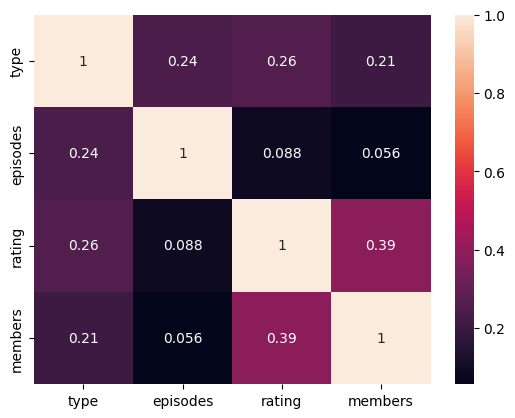

In [38]:
sns.heatmap(df.iloc[:,3:].corr(),annot = True)
plt.show()

In [39]:
df.describe()

,anime_id,type,episodes,rating,members
count,11903.000000,11903.000000,11903.000000,11903.000000,1.190300e+04
mean,13515.515080,3.027892,12.426279,6.484543,1.844488e+04
std,11174.446066,1.815714,46.959892,1.016018,5.521622e+04
min,1.000000,0.000000,1.000000,1.670000,5.000000e+00
25%,3361.500000,2.000000,1.000000,5.900000,2.340000e+02
50%,9885.000000,3.000000,2.000000,6.570000,1.596000e+03
75%,23485.000000,5.000000,12.000000,7.180000,9.830000e+03
max,34527.000000,5.000000,1818.000000,10.000000,1.013917e+06


In [40]:
rating_values = {
    '8-10' : 0,
    '6-8' : 0,
    '4-6' : 0,
    '<4' : 0
}
for i in df['rating']:
    if i >= 8:
        rating_values['8-10'] += 1
    elif i >= 6:
        rating_values['6-8'] += 1
    elif i >= 4:
        rating_values['4-6'] += 1
    else:
        rating_values['<4'] += 1
rating_values
        

{'8-10': 618, '6-8': 8035, '4-6': 3029, '<4': 221}

In [41]:
rating_values.keys()

dict_keys(['8-10', '6-8', '4-6', '<4'])

In [42]:
rating_values.values()

dict_values([618, 8035, 3029, 221])

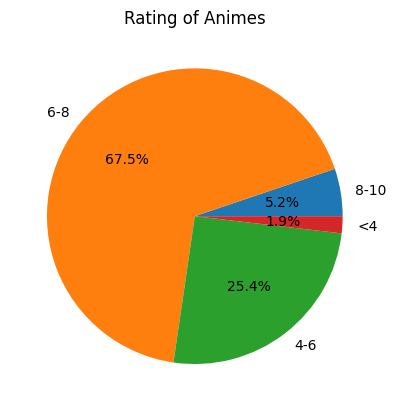

In [43]:
plt.pie(rating_values.values(),labels=rating_values.keys(),autopct='%1.1f%%')
plt.title('Rating of Animes')
plt.show()

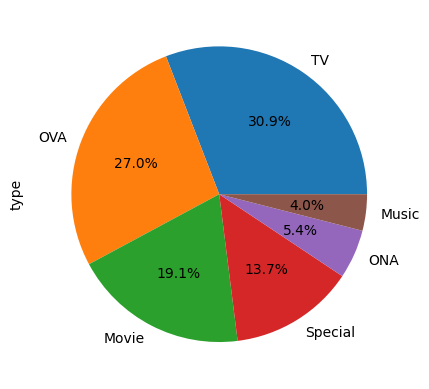

In [44]:
data_copy['type'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

In [45]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266


In [46]:
encoding_values

{'Movie': 0, 'TV': 5, 'OVA': 3, 'Special': 4, 'Music': 1, 'ONA': 2}

In [47]:
OVA = 'Original Video Animation'
ONA = 'Original Net Animation'

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11903 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11903 non-null  int64  
 1   name      11903 non-null  object 
 2   genre     11903 non-null  object 
 3   type      11903 non-null  int32  
 4   episodes  11903 non-null  int32  
 5   rating    11903 non-null  float64
 6   members   11903 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 650.9+ KB


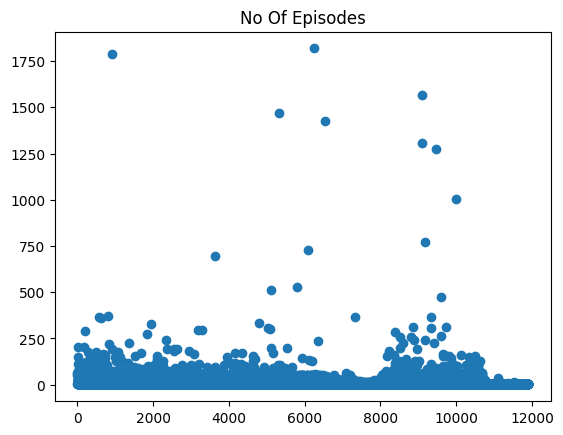

In [49]:
# plt.figure(figsize=(100,100))
plt.scatter(np.arange(len(df['episodes'])),df['episodes'])
plt.title('No Of Episodes')
plt.show()

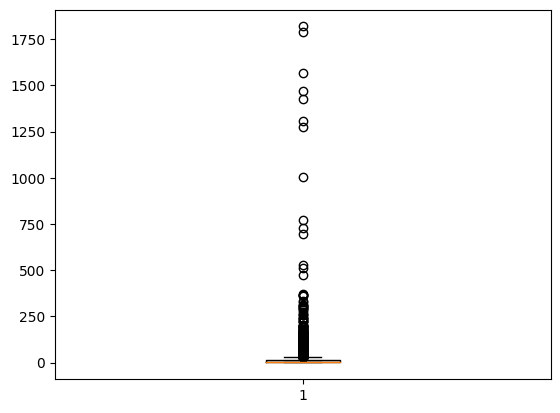

In [51]:
plt.boxplot(df['episodes'])
plt.show()

In [52]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266


In [58]:
def call(st):
    return "".join([i for i in st if i.isalnum() or i == ' '])

In [59]:
call(st)

'Fullmetal Alchemist Brotherhood'

In [61]:
df_mid = df.copy()

In [62]:
df['name'] = df['name'].apply(call)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.25,114262
3,9253,SteinsGate,"Sci-Fi, Thriller",5,24,9.17,673572
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",5,51,9.16,151266
